ray1      ray2      ray3      ray4      ray5     kartx     karty  \
0     -1.0  6.520244  4.611088  6.490520  4.588913  15.98891  0.265520   
1     -1.0  6.520148  4.611084  6.490616  4.588917  15.98892  0.273316   
2     -1.0  6.520138  4.611078  6.490626  4.588923  15.98892  0.275297   
3     -1.0  6.520134  4.611075  6.490630  4.588926  15.98893  0.275683   
4     -1.0  6.520125  4.611069  6.490639  4.588933  15.98893  0.275743   
...    ...       ...       ...       ...       ...       ...       ...   
2943  -1.0  8.948369 -1.000000  3.575348  2.275224 -41.65403  0.279193   
2944  -1.0  9.993568 -1.000000  3.048804  2.165597 -41.55990  0.279185   
2945  -1.0 -1.000000 -1.000000  2.685049  1.997417 -41.38477  0.279173   
2946  -1.0 -1.000000 -1.000000  2.450927  1.828517 -41.21993  0.279164   
2947  -1.0 -1.000000 -1.000000  2.280018  1.700224 -41.09257  0.279162   

          kartz       time           action  
0      3.105228   0.102285             NONE  
1      3.105127   0.204416             NONE  
2      3.105107   0.304207             NONE  
3      3.105103   0.400486             NONE  
4      3.105103   0.501602             NONE  
...         ...        ...              ...  
2943  37.803890  29.202810  LEFT_ACCELERATE  
2944  36.341170  29.301410  LEFT_ACCELERATE  
2945  34.874940  29.400590  LEFT_ACCELERATE  
2946  33.357790  29.503070       ACCELERATE  
2947  31.919370  29.600020       ACCELERATE  

[2948 rows x 10 columns]

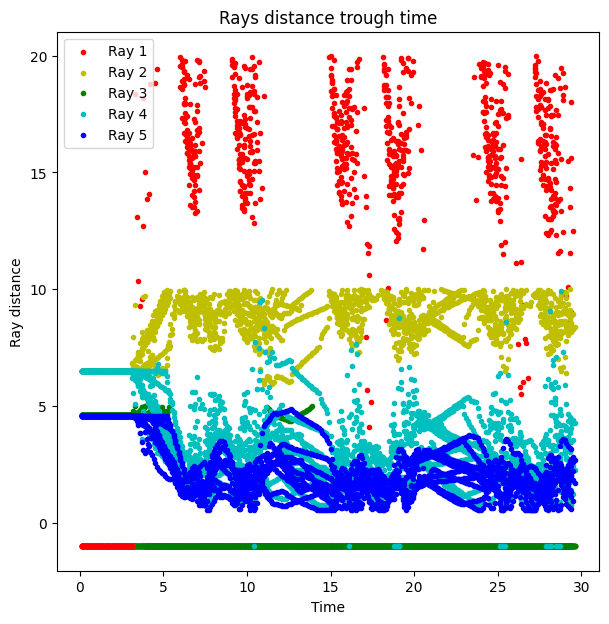

In [1]:
from ann import cost, cost_regL2, backprop, backprop2, predict, feedForward

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os

#Colormaps https://matplotlib.org/stable/users/explain/colors/colormaps.html#references

#Nota: para calcular la precision del modelo vamos a redondear la salida, pues nos
#interesa saber que el modelo gira a la derecha, no que esta 95% seguro de girar a la derecha

#Ejercicio 2
kartData = pd.DataFrame()

trainFiles = len(os.listdir('AAKart/ML/'))
for i in range(trainFiles):
    newKartData = pd.read_csv(f'AAKart/ML/Kart{i:02d}.csv')
    
    kartData = pd.concat([kartData, newKartData], axis=0, ignore_index=True)

display(kartData)

#Tabla posicion 2D a traves del tiempo
positionThroughTime = px.scatter_3d(kartData, x='kartx', y='kartz', z='time', color='action', 
                                    color_discrete_sequence=px.colors.qualitative.Set1)
positionThroughTime.update_traces(marker_size = 3)

positionThroughTime.update_layout(scene=dict(xaxis_title='Kart X', yaxis_title='Kart Z', zaxis_title='Time'))
positionThroughTime.update_layout(legend_title='Action')
positionThroughTime.update_layout(title='Kart 2D position through time')

positionThroughTime.show()

#Distancia de los rayos a traves del tiempo
plt.figure(figsize=(7, 7))
plt.scatter(kartData['time'], kartData['ray1'], c='r', marker='.', label="Ray 1")
plt.scatter(kartData['time'], kartData['ray2'], c='y', marker='.', label="Ray 2")
plt.scatter(kartData['time'], kartData['ray3'], c='g', marker='.', label="Ray 3")
plt.scatter(kartData['time'], kartData['ray4'], c='c', marker='.', label="Ray 4")
plt.scatter(kartData['time'], kartData['ray5'], c='b', marker='.', label="Ray 5")
plt.xlabel('Time')
plt.ylabel('Ray distance')
plt.legend()
plt.title('Rays distance trough time')
plt.show()

ray1      ray2      ray3      ray4      ray5           action
0      1.0  0.145712  0.408871  0.625336  0.938163             NONE
1      1.0  0.145688  0.408865  0.625347  0.938164             NONE
2      1.0  0.145686  0.408856  0.625348  0.938166             NONE
3      1.0  0.145685  0.408851  0.625348  0.938166             NONE
4      1.0  0.145682  0.408842  0.625349  0.938168             NONE
...    ...       ...       ...       ...       ...              ...
2943   1.0  0.742368  1.000000  0.306106  0.403238  LEFT_ACCELERATE
2944   1.0  0.999201  1.000000  0.248446  0.377893  LEFT_ACCELERATE
2945   1.0  1.000000  1.000000  0.208613  0.339009  LEFT_ACCELERATE
2946   1.0  1.000000  1.000000  0.182975  0.299960       ACCELERATE
2947   1.0  1.000000  1.000000  0.164259  0.270298       ACCELERATE

[2948 rows x 6 columns]

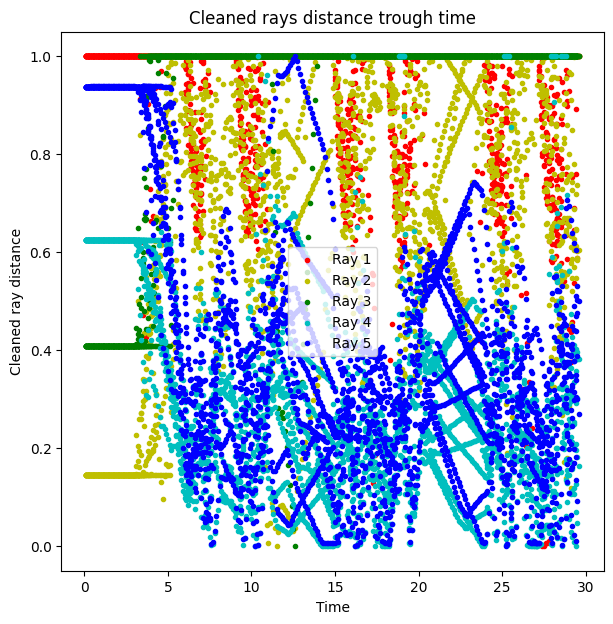

In [2]:
from sklearn.preprocessing import MinMaxScaler

#Ejercicio 3

#Kart y y time son inutiles para el modelo
cleanKartData = kartData.drop(columns=['kartx', 'karty', 'kartz', 'time'])

#Normalizar distancia de obstaculos en cada rayo
scaler = MinMaxScaler()

columnsToNormalize = ['ray1', 'ray2', 'ray3', 'ray4', 'ray5']

for column in columnsToNormalize:
    mask = (kartData[column] != -1)
    cleanKartData.loc[mask, column] = scaler.fit_transform(cleanKartData.loc[mask, [column]])
    
    #Si no hemos chocado con nada, significa que "no hay peligro", es decir, que tenemos la distancia del rayo segura
    invalidMask = (kartData[column] == -1)
    cleanKartData.loc[invalidMask, column] = 1

display(cleanKartData)

#Distancia limpia de los rayos a traves del tiempo
plt.figure(figsize=(7, 7))
plt.scatter(kartData['time'], cleanKartData['ray1'], c='r', marker='.', label="Ray 1")
plt.scatter(kartData['time'], cleanKartData['ray2'], c='y', marker='.', label="Ray 2")
plt.scatter(kartData['time'], cleanKartData['ray3'], c='g', marker='.', label="Ray 3")
plt.scatter(kartData['time'], cleanKartData['ray4'], c='c', marker='.', label="Ray 4")
plt.scatter(kartData['time'], cleanKartData['ray5'], c='b', marker='.', label="Ray 5")
plt.xlabel('Time')
plt.ylabel('Cleaned ray distance')
plt.legend()
plt.title('Cleaned rays distance trough time')
plt.show()

#Exportamos cleanKartData a Unity. Allí se programará el feedforward.

In [6]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering, KMeans
from six import StringIO
from IPython.display import Image

import pydotplus

#Ejercicio 4

#El modelo predice la action mas probable que haría el jugador grabado en kartData
encoder = OneHotEncoder(sparse_output=False)

X = cleanKartData.drop(columns=['action'])
y = encoder.fit_transform(cleanKartData[['action']])

#Relación entre action e index
display(cleanKartData[['action']])
display(y)

#Separación de datos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

#Perceptrón multicapa propio
print('DATOS DEL PERCEPTRÓN MULTICAPA PROPIO\n')

#Número de neuronas de cada capa. Experimentar con el número de neuronas y de capas para conseguir un mejor resultado.
#A mayor número de capas, mejor capacidad para aprender representaciones jerárquicas y características abstractas de los datos.
#A mayor número de neuronas, mejor capacidad para aprender representaciones más complejas de los datos.
#Sin embargo, al aumentar estos números, puede aumentar el riesgo de sobreajuste, 
#especialmente si no hay suficientes datos de entrenamiento.
layer_sizes = [X.shape[1], 10, len(kartData['action'].unique())]
epsilon = 0.12
theta_list = []

for i in range(len(layer_sizes) - 1):
    theta_list.append(np.random.rand(layer_sizes[i + 1], layer_sizes[i] + 1) * 2 * epsilon - epsilon)

iterations = 1000
lambda_ = 1
alpha = 1

for i in range(iterations):
    cost, grads = backprop(theta_list, X_train, y_train, lambda_)

    for j in range(len(theta_list)):
        theta_list[j] -= alpha * grads[j]

predictions = predict(theta_list, X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión del perceptrón: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)
print(f'Matriz de confusión:\n {conf_matrix}')

mse = mean_squared_error(np.argmax(y_test, axis=1), predictions)
print(f'Error cuadratico medio: {mse:.2f} \n')

#MLP Classifier
print('------------------------------\n')
print('DATOS DEL MLP CLASSIFIER DE SKLEARN\n')

mlp_classifier = MLPClassifier(hidden_layer_sizes=layer_sizes[1:-1], max_iter=iterations, alpha=alpha, learning_rate_init=lambda_, random_state=8)
mlp_classifier.fit(X_train, np.argmax(y_train, axis=1))

predictions = mlp_classifier.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión de MLP Classifier: {accuracy * 100:.2f}%. Activation = \'relu\', Learning_rate = \'constant\'')

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)
print(f'Matriz de confusión:\n {conf_matrix} \n')

mse = mean_squared_error(np.argmax(y_test, axis=1), predictions)
print(f'Error cuadratico medio: {mse:.2f} \n')

#MLP Classifier ajustada
mlp_classifier_2 = MLPClassifier(hidden_layer_sizes=layer_sizes[1:-1], activation='logistic', learning_rate='adaptive', max_iter=iterations, alpha=alpha, learning_rate_init=lambda_, random_state=8)
mlp_classifier_2.fit(X_train, np.argmax(y_train, axis=1))

predictions = mlp_classifier_2.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión de MLP Classifier: {accuracy * 100:.2f}%. Activation = \'logistic\', Learning_rate = \'adaptive\'')

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)
print(f'Matriz de confusión:\n {conf_matrix} \n')

mse = mean_squared_error(np.argmax(y_test, axis=1), predictions)
print(f'Error cuadratico medio: {mse:.2f} \n')

#MLP Classifier ajustada
mlp_classifier_3 = MLPClassifier(hidden_layer_sizes=layer_sizes[1:-1], activation='tanh', learning_rate='invscaling', max_iter=iterations, alpha=alpha, learning_rate_init=lambda_, random_state=8)
mlp_classifier_3.fit(X_train, np.argmax(y_train, axis=1))

predictions = mlp_classifier_3.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión de MLP Classifier: {accuracy * 100:.2f}%. Activation = \'tanh\', Learning_rate = \'invscaling\'')

#MLP Classifier ajustada Matriz de confusion y MSE
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)
print(f'Matriz de confusión:\n {conf_matrix} \n')

mse = mean_squared_error(np.argmax(y_test, axis=1), predictions)
print(f'Error cuadratico medio: {mse:.2f} \n')

# KNN
print('------------------------------\n')
print('DATOS DEL KNN\n')

#Valores de k a testear para el knn
knn_ks = [1, 3, 20, 50, 100]

for k in knn_ks:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, np.argmax(y_train, axis=1))

    predictions = knn_classifier.predict(X_test)

    accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
    print(f'Precisión del {k}NN: {accuracy * 100:.2f}%')

    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)
    print(f'Matriz de confusión:\n {conf_matrix}')

    mse = mean_squared_error(np.argmax(y_test, axis=1), predictions)
    print(f'Error cuadrático medio: {mse:.2f} \n')

# ID3 (Decision Tree)
print('------------------------------\n')
print('DATOS DEL ID3 (Decision Tree)\n')

id3_classifier = DecisionTreeClassifier()
id3_classifier.fit(X_train, np.argmax(y_train, axis=1))

predictions = id3_classifier.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión del ID3: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)
print(f'Matriz de confusión:\n {conf_matrix}')

mse = mean_squared_error(np.argmax(y_test, axis=1), predictions)
print(f'Error cuadrático medio: {mse:.2f} \n')

dot_data = StringIO()
export_graphviz(id3_classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, 
                feature_names=['ray1', 'ray2', 'ray3', 'ray4', 'ray5'], 
                class_names=['NONE', 'ACCELERATE', 'LEFT_ACCELERATE', 'RIGHT_ACCELERATE'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
display(Image(graph.create_png()))

# Random Forest
print('------------------------------\n')
print('DATOS DEL RANDOM FOREST\n')

random_forest_trees_number = 100

random_forest_classifier = RandomForestClassifier(n_estimators=random_forest_trees_number)
random_forest_classifier.fit(X_train, np.argmax(y_train, axis=1))

predictions = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión del Random Forest con {random_forest_trees_number} árboles: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)
print(f'Matriz de confusión:\n {conf_matrix}')

mse = mean_squared_error(np.argmax(y_test, axis=1), predictions)
print(f'Error cuadrático medio: {mse:.2f} \n')

# SVM (Support Vector Machine)
print('------------------------------\n')
print('DATOS DEL SUPPORT VECTOR MACHINE (SVM)\n')

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, np.argmax(y_train, axis=1))

predictions = svm_classifier.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión del SVM: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)
print(f'Matriz de confusión:\n {conf_matrix}')

mse = mean_squared_error(np.argmax(y_test, axis=1), predictions)
print(f'Error cuadrático medio: {mse:.2f} \n')

# K-Means
print('------------------------------\n')
print('DATOS DEL K-MEANS\n')

#Valores de k a testear para el k-means
kmeans_ks = range(1,5)

for k in kmeans_ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=4)
    kmeans.fit(X_train)

    predictions = kmeans.predict(X_test)

    accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
    print(f'Precisión del {k}-means: {accuracy * 100:.2f}%')

    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)
    print(f'Matriz de confusión:\n {conf_matrix}')

    mse = mean_squared_error(np.argmax(y_test, axis=1), predictions)
    print(f'Error cuadrático medio: {mse:.2f} \n')


action
0                NONE
1                NONE
2                NONE
3                NONE
4                NONE
...               ...
2943  LEFT_ACCELERATE
2944  LEFT_ACCELERATE
2945  LEFT_ACCELERATE
2946       ACCELERATE
2947       ACCELERATE

[2948 rows x 1 columns]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

DATOS DEL PERCEPTRÓN MULTICAPA PROPIO

Precisión del perceptrón: 70.01%
Matriz de confusión:
 [[267 115   0   0]
 [ 77 249   0   0]
 [ 14   0   0   0]
 [  8   7   0   0]]
Error cuadratico medio: 0.47 

------------------------------

DATOS DEL MLP CLASSIFIER DE SKLEARN

Precisión de MLP Classifier: 51.83%. Activation = 'relu', Learning_rate = 'constant'
Matriz de confusión:
 [[382   0   0   0]
 [326   0   0   0]
 [ 14   0   0   0]
 [ 15   0   0   0]] 

Error cuadratico medio: 0.70 

Precisión de MLP Classifier: 51.83%. Activation = 'logistic', Learning_rate = 'adaptive'
Matriz de confusión:
 [[382   0   0   0]
 [326   0   0   0]
 [ 14   0   0   0]
 [ 15   0   0   0]] 

Error cuadratico medio: 0.70 

Precisión de MLP Classifier: 51.97%. Activation = 'tanh', Learning_rate = 'invscaling'
Matriz de confusión:
 [[382   0   0   0]
 [325   1   0   0]
 [ 14   0   0   0]
 [ 15   0   0   0]] 

Error cuadratico medio: 0.70 

------------------------------

DATOS DEL KNN

Precisión del 1NN: 67.16%

------------------------------

DATOS DEL RANDOM FOREST

Precisión del Random Forest con 100 árboles: 71.64%
Matriz de confusión:
 [[284  86   8   4]
 [ 88 237   0   1]
 [  7   0   7   0]
 [ 12   3   0   0]]
Error cuadrático medio: 0.53 

------------------------------

DATOS DEL SUPPORT VECTOR MACHINE (SVM)

Precisión del SVM: 73.95%
Matriz de confusión:
 [[354  28   0   0]
 [135 191   0   0]
 [ 14   0   0   0]
 [ 12   3   0   0]]
Error cuadrático medio: 0.46 

------------------------------

DATOS DEL K-MEANS

Precisión del 1-means: 51.83%
Matriz de confusión:
 [[382   0   0   0]
 [326   0   0   0]
 [ 14   0   0   0]
 [ 15   0   0   0]]
Error cuadrático medio: 0.70 

Precisión del 2-means: 45.73%
Matriz de confusión:
 [[298  84   0   0]
 [287  39   0   0]
 [  0  14   0   0]
 [ 15   0   0   0]]
Error cuadrático medio: 0.71 

Precisión del 3-means: 35.14%
Matriz de confusión:
 [[ 93 216  73   0]
 [150 152  24   0]
 [  0   0  14   0]
 [  1  14   0   0]]
Error cuadrático medio: 1.01 

Pr

# Resultados
Precisión del perceptrón: 74.08%

Precisión de MLP Classifier: 51.83%. Activation = 'relu', Learning_rate = 'constant'

Precisión de MLP Classifier: 51.83%. Activation = 'logistic', Learning_rate = 'adaptive'

Precisión de MLP Classifier: 51.97%. Activation = 'tanh', Learning_rate = 'invscaling'

Precisión del 1NN: 67.16%

Precisión del 3NN: 73.00%

Precisión del 20NN: 75.58%

Precisión del 50NN: 76.39%

Precisión del 100NN: 76.26%

Precisión del ID3: 65.67%

Precisión del Random Forest con 100 árboles: 72.32%

Precisión del SVM: 73.95%

Precisión del 1-means: 51.83%

Precisión del 2-means: 45.73%

Precisión del 3-means: 35.14%

Precisión del 4-means: 23.34%

# Conclusión
Luego de evaluar diferentes modelos de aprendizaje automático para el juego, podemos observar que el rendimiento varía significativamente entre ellos.

Nuestro perceptrón produce un resultado sospechosamente superior al de SKLearn, alcanzando una precisión de 74.08% y 51.97% respectivamente. Se ha optado por usar 1 capa oculta de 10 neuronas, puesto a que aumentar el número de capas y neuronas, la precisión disminuye. Por ejemplo, con 2 capas ocultas de 10 neuronas, los resultados de nuestro perceptrón y el de SKLearn se emparejan. A mayor número de capas, mejor capacidad para aprender representaciones jerárquicas y características abstractas de los datos. A mayor número de neuronas, mejor capacidad para aprender representaciones más complejas de los datos. Sin embargo, al aumentar estos números, puede aumentar el riesgo de sobreajuste, especialmente si no hay suficientes datos de entrenamiento.

Los modelos basados en k-Nearest Neighbors (kNN) muestran un rendimiento creciente con el aumento de vecinos considerados, alcanzando una precisión máxima del 76.39% con 50 vecinos. Este enfoque se destaca por su simplicidad y la capacidad de adaptarse bien a patrones complejos en los datos. Sin embargo, puede volverse computacionalmente costoso con conjuntos de datos grandes.

Los modelos basados en árboles de decisión, como ID3 y Random Forest, también ofrecen resultados competitivos, alcanzando una precisión del 65.67% y 72.32%, respectivamente. Estos modelos son robustos y pueden manejar características complejas, pero pueden ser propensos al sobreajuste. Estos algoritmos son de caja blanca y podemos ver los árboles generados. Se puede ver el árbol generado por ID3 en ID3.png.

El Support Vector Machine (SVM) presenta una precisión del 73.95%, mostrando un rendimiento sólido en problemas de clasificación. Los SVM son eficaces en espacios de alta dimensión y pueden manejar relaciones no lineales.

El enfoque de k-means clustering, por otro lado, no proporciona resultados competitivos, ya que la precisión disminuye con el aumento del número de clusters. Creemos que esto se debe a que sí conocemos el número de clases en las que se clasifica la salida, por lo que no tiene sentido aplicar técnicas de aprendizaje no supervisado.

En el juego se ha implementado el MLP de SKLearn, debido a que el método ExportAllformatsMLPSKlearn requiere de una clase classifier, y nuestro perceptrón no lo es. Por falta de tiempo no hemos podido investigar cómo podríamos exportar nuestro propio perceptrón. En el caso de elegir un segundo modelo (que no hemos implementado, es decir, no hemos hecho el ejercicio 6), escogeríamos el K-Nearest Neighbour porque tiene una precisión superior a todos los demás, no requiere de entrenamiento y disponemos de todos los datos necesarios dentro del juego.

In [4]:
from sklearn.preprocessing import StandardScaler
from Utils import ExportAllformatsMLPSKlearn

#Ejercicio 5
scaler = StandardScaler()

ExportAllformatsMLPSKlearn(
    mlp=mlp_classifier,
    X=scaler.fit_transform(X),
    picklefileName='mlp_model.pkl',
    onixFileName='mlp_model.onnx',
    jsonFileName='mlp_model.json',
    customFileName='mlp_model.txt'
)